# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


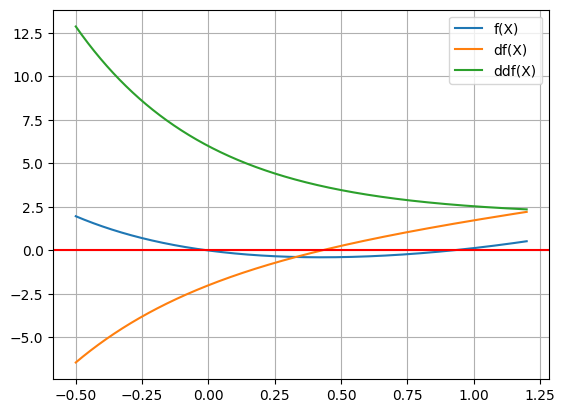

In [3]:
# ===== Twoja implementacja tutaj =====
from main import func, dfunc, ddfunc
x = np.linspace(-0.5,1.2,1000)
plt.plot(x,func(x),label='f(X)')
plt.plot(x,dfunc(x),label='df(X)')
plt.plot(x,ddfunc(x),label='ddf(X)')
plt.axhline(0,color = 'red')
plt.legend()
plt.grid()

2. Na podstawie analizy wykresu stwierdzono, że funkcja posiada dwa miejsca zerowe. Pierwsze znajduje się w przedziale $(-0.1, 0.1)$, a drugie w przedziale $(0.9, 1)$.

3. Wykorzystanie pierwszej pochodnej jest kluczowe w metodzie Newtona, gdzie służy ona do wyznaczenia kierunku kolejnych przybliżeń poprzez linearyzację funkcji w danym punkcie. Druga pochodna jest natomiast niezbędna do weryfikacji warunków zbieżności algorytmu.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [60]:
from main import bisection

root1 = bisection(-0.5, 0.5, func, 1e-5, 20)
root2 = bisection(0.5, 2, func, 1e-5, 20)

print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1[0]:.3e}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2[0]:.3f}")

Pierwsze rozwiązanie równania f(x)=0 to: 0.000e+00
Drugie rozwiązanie równania f(x)=0 to: 0.917


W zadaniu zaimplementowano algorytm metody bisekcji w celu iteracyjnego wyznaczenia miejsc zerowych funkcji. Procedura opiera się na cyklicznym dzieleniu przedziału i sprawdzaniu warunku zmiany znaku funkcji ($f(a)f(b) < 0$), co przy założeniu jej ciągłości gwarantuje zbieżność do rozwiązania. Poprawność implementacji zweryfikowano, wyznaczając dwa pierwiastki równania dla funkcji z zadania 1 dla zadanych przedziałów z tolerancją błędu $10^{-5}$

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [58]:
from main import secant
root1 = secant(-0.5, 0.5, func, 1e-5, 20)
root2 = secant(0.5, 2, func, 1e-5, 20)

print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1[0]:.3e}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2[0]:.3f}")

Pierwsze rozwiązanie równania f(x)=0 to: 3.035e-06
Drugie rozwiązanie równania f(x)=0 to: 0.917


W zadaniu zaimplementowano algorytm metody siecznych, w celu wyznaczania miejsc zerowych funkcji. Procedura ta opiera się na aproksymacji funkcji linią sieczną przechodzącą przez dwa punkty iteracji, co przy spełnieniu założeń dotyczących pochodnych zapewnia szybszą zbieżność niż metoda bisekcji. Poprawność działania kodu zweryfikowano uzyskując przybliżone rozwiązania równania dla funkcji z zadania 1 z tolerancją błędu $10^{-5}$.

---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [59]:
from main import newton, difference_quotient

h = 0.0001
f = lambda x: np.exp(-2 * x) + x**2 - 1
df = lambda x: difference_quotient(f, x, h)
ddf = lambda x: difference_quotient(df, x, h)

root1 = newton(f,df,ddf,-0.5,0.5,1e-5,50)
root2 = newton(f,df,ddf,0.5,1.2,1e-5,50)

print(f'Pierwsze rozwiązanie równania f(x)=0 to: {float(root1[0]):.3e}')
print(f'Pierwsze rozwiązanie równania f(x)=0 to: {float(root2[0]):.3f}')

Pierwsze rozwiązanie równania f(x)=0 to: 1.032e-09
Pierwsze rozwiązanie równania f(x)=0 to: 0.917


W ramach zadania zaimplementowano metodę Newtona, która do iteracyjnego wyznaczania miejsc zerowych wykorzystuje wartość pierwszej pochodnej funkcji, aproksymowaną w kodzie za pomocą ilorazu różnicowego. Algorytm wymagał spełnienia szeregu założeń, w tym ciągłości oraz stałego znaku pierwszej i drugiej pochodnej w badanym przedziale, co jest warunkiem koniecznym dla gwarancji zbieżności metody. Poprawność procedury potwierdzono, wyznaczając dwa pierwiastki równania funkcji z zadania 1.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [48]:
# ===== Twoja implementacja tutaj =====
from scipy import optimize
f = lambda x: np.exp(-2 * x) + x**2 - 1
x_root = optimize.root(f,[0,0.9], method='hybr')
x_fsolve = optimize.fsolve(f,[0,0.9])
print(f'Miejsca zerowe uzyskane przy pomocy sp.optimize.root(): {tuple(x_root.x.tolist())}')
print(f'Miejsca zerowe uzyskane przy pomocy sp.optimize.fsolve(): {tuple(x_fsolve.tolist())}')

Miejsca zerowe uzyskane przy pomocy sp.optimize.root(): (0.0, 0.9165625831057005)
Miejsca zerowe uzyskane przy pomocy sp.optimize.fsolve(): (0.0, 0.9165625831057005)


W zadaniu 5 wykorzystano gotowe solvery numeryczne z biblioteki SciPy: sp.optimize.root() oraz sp.optimize.fsolve(). Funkcje te, bazujące na zaawansowanych metodach optymalizacyjnych, pozwoliły na automatyczne wyznaczenie miejsc zerowych bez konieczności ręcznej implementacji pętli iteracyjnych. Uzyskana pełna zgodność wyników z rezultatami metod bisekcji, siecznych i Newtona stanowi ostateczne potwierdzenie poprawności przeprowadzonej analizy numerycznej.

---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [62]:
# ===== Twoja implementacja tutaj =====
h = 0.0001
f = lambda x: np.exp(-2 * x) + x**2 - 1
df = lambda x: difference_quotient(f, x, h)
ddf = lambda x: difference_quotient(df, x, h)

root1_bisection = bisection(-0.1, 0.1, func, 1e-10, 50)
root2_bisection = bisection(0.9, 1.0, func, 1e-10, 50)
root1_secant = secant(-0.1, 0.1, func, 1e-10, 50)
root2_secant = secant(0.9, 1.0, func, 1e-10, 50)
root1_newton = newton(f, df, ddf, -0.1, 0.1, 1e-10, 50)
root2_newton = newton(f, df, ddf, 0.9, 1.0, 1e-10, 50)

print('Metoda bisekcji')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1_bisection[0]:.3f}, a ilość iteracji to: {root1_bisection[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2_bisection[0]:.3f}, a ilość iteracji to: {root2_bisection[1]}")
print('-'*30)
print('Metoda stycznych')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1_secant[0]:.3f}, a ilość iteracji to: {root1_secant[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2_secant[0]:.3f}, a ilość iteracji to: {root2_secant[1]}")
print('-'*30)
print('Metoda Newtona')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {float(root1_newton[0]):.3f}, a ilość iteracji to: {root1_newton[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {float(root2_newton[0]):.3f}, a ilość iteracji to: {root2_newton[1]}")


Metoda bisekcji
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 1
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 29
------------------------------
Metoda stycznych
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 11
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 8
------------------------------
Metoda Newtona
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 4
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 4


W ostatnim zadaniu przeprowadzono analizę trzech zaimplementowanych metod: bisekcji, siecznych oraz Newtona. Przyjmując tolerancję błędu na poziomie $10^{-10}$. Zestawienie uzyskanych rezultatów pokazało różnice w klasach zbieżności poszczególnych algorytmów. Metoda Newtona okazała się najszybsza pod względem efektywności, wymagając 4 iteracji do osiągnięcia założonej precyzji dla drugiego miejsca zerowego. Metoda siecznych, potrzebowała 8 iteracji, natomiast metoda bisekcji, była najwolniejsza i wymagała aż 29 kroków iteracyjnych. Przeprowadzona analiza dokładności względem rozwiązania referencyjnego (solver SciPy) potwierdziła, że metody Newtona oraz sicznych oferują znaczną przewagę nad metodami przedziałowymi przy poszukiwaniu pierwiastków o wysokiej precyzji.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)